# GMM Tutorial
Imports, Notably tryAllCovs() Function

In [2]:
import import_ipynb
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
# from GetEmbeddings import embeds
# from GMMPrac import tryAllCovs, nllCircs
from sklearn.mixture import GaussianMixture

### tryAllCovs(X (data), Y (labels), train/test split (every _ datapoint), graphable?, supervised?)
This function will take in data and labels and create clusters with the training sampling of the data and use the mean of each labeled class within the training data to "supervise" the clustering. Looping through any possible covariance type, the GMM will classify the training set and the testing set and produce a train and test accuracy according to the given labels. Copy pasted below as well

In [ ]:
def tryAllCovs(X, Y, sliceBy, twoD=False, sup=True):
    import numpy as np
    from sklearn.mixture import GaussianMixture
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from matplotlib.colors import LogNorm
    # take every sliceBy element as the test set and the rest 
    # for train
    X_train = X[np.mod(np.arange(X.shape[0]),sliceBy)!=0]
    y_train = Y[np.mod(np.arange(Y.shape[0]),sliceBy)!=0]
    X_test = X[::sliceBy]
    y_test = Y[::sliceBy]
    # store accuracies
    test_accs = []
    train_accs = []
    
    n_classes = len(np.unique(y_train))
    colors = ['turquoise', 'darkorange']
    # Try GMMs using different types of covariances.
    estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

    n_estimators = len(estimators)

    plt.figure(figsize=(3 * n_estimators // 2, 6))
    plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)

    labels = ["one", "two"]

    for index, (name, estimator) in enumerate(estimators.items()):
        # Since we have class labels for the training data, we can
        # initialize the GMM parameters in a supervised manner.
        if sup:
            estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

        # Train the other parameters using the EM algorithm.
        estimator.fit(X_train)
        
        # if twoD, graph it
        if twoD:
            h = plt.subplot(2, n_estimators // 2, index + 1)
            make_ellipses(estimator, h)

            for n, color in enumerate(colors):
                data = X[Y == n]
                plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=labels[n])
            # Plot the test data with crosses
            for n, color in enumerate(colors):
                data = X_test[y_test == n]
                plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)
    
        y_train_pred = estimator.predict(X_train)
        train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
        

        y_test_pred = estimator.predict(X_test)
        test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
        
        train_accs.append(train_accuracy)
        test_accs.append(test_accuracy)
        
        print(name + ' - Train accuracy: %.1f Test accuracy: %.1f' % (train_accuracy, test_accuracy))
        
        if twoD:
            plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)
            plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)
            plt.xticks(())
            plt.yticks(())
            plt.title(name)

    if twoD:
        plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


        plt.show()
        
    return train_accs, test_accs

## Bringing in Data-

In [3]:
# Get base directory of your NDA dataset 
path = "bruh/"
subjects = "ndar_subject01.txt"

# Choose the clinical or image data you want to look into
ados = 'ados3_201201.txt'
adhd = 'adhdrs01.txt'
# In this case two clinical for proof of concept, but in the future 
# clinical + dataframe of images (subject_key_id, model embedding)

In [4]:
sdf = pd.read_csv(os.path.join(path, subjects), delimiter = '\t')
sdf.columns

Index(['collection_id', 'ndar_subject01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex', 'race',
       'ethnic_group',
       ...
       'evaldate', 'multibirthid', 'tourettes_disorder', 'sample',
       'race_other', 'respond', 'date_confirmed_phenotype', 'pos_years',
       'position1', 'collection_title'],
      dtype='object', length=137)

In [5]:
ADSdf = pd.read_csv(os.path.join(path, ados), delimiter = '\t')
ADSdf.columns

Index(['collection_id', 'ados3_201201_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex',
       'comments_misc', 'observation_c_1', 'observation_c_1_1',
       'observation_c_2', 'observation_c_3', 'observation_c_4',
       'observation_c_5', 'observation_c_6', 'observation_c_7',
       'observation_c_8', 'observation_c_9', 'observation_c_10',
       'observation_c_11', 'observation2_c_12', 'observation_c_13',
       'observation_c_14', 'codinga2_olang_c', 'codinga_spabn_c',
       'codinga_iecho_c', 'codinga_stereo_c', 'codinga_oinfo_c',
       'codinga_ainfo_c', 'codinga_reprt_c', 'codinga_convs_c',
       'codinga_gest_c', 'codingb_ueye_c', 'codingb_facee_c',
       'codingb_llnvc_c', 'codingb_shrnj_c', 'codingb2_empth_c',
       'codingb2_insig_c', 'codingb_qsov_c', 'codingb_asov_c',
       'codingb_qsres_c', 'codingb_arsoc_c', 'codingb_oqrap_c',
       'codingc_imgcr_c', 'codingd_usens_c', 'codingd_usens_c_cmt',
       'codingd_oman

In [6]:
ADHD = pd.read_csv(os.path.join(path, adhd), delimiter = '\t')
ADHD.columns

Index(['collection_id', 'adhdrs01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex',
       'relationship', 'resp_sex', 'p_c_adhdrs_1', 'p_c_adhdrs_1_rc',
       'p_c_adhdrs_2', 'p_c_adhdrs_2_rc', 'p_c_adhdrs_3', 'p_c_adhdrs_3_rc',
       'p_c_adhdrs_4', 'p_c_adhdrs_4_rc', 'p_c_adhdrs_5', 'p_c_adhdrs_5_rc',
       'p_c_adhdrs_6', 'p_c_adhdrs_6_rc', 'p_c_adhdrs_7', 'p_c_adhdrs_7_rc',
       'p_c_adhdrs_8', 'p_c_adhdrs_8_rc', 'p_c_adhdrs_9', 'p_c_adhdrs_9_rc',
       'p_c_adhdrs_10', 'p_c_adhdrs_10_rc', 'p_c_adhdrs_11',
       'p_c_adhdrs_11_rc', 'p_c_adhdrs_12', 'p_c_adhdrs_12_rc',
       'p_c_adhdrs_13', 'p_c_adhdrs_13_rc', 'p_c_adhdrs_14',
       'p_c_adhdrs_14_rc', 'p_c_adhdrs_15', 'p_c_adhdrs_15_rc',
       'p_c_adhdrs_16', 'p_c_adhdrs_16_rc', 'p_c_adhdrs_17',
       'p_c_adhdrs_17_rc', 'p_c_adhdrs_18', 'p_c_adhdrs_18_rc',
       'p_c_adhdrs_19', 'p_c_adhdrs_20', 'p_c_adhdrs_21', 'p_c_adhdrs_22',
       'p_c_adhdrs_23', 'p_c_adhdrs_24

Data exploration can help you choose which columns you'd like to use as features of the subjects specific clinical test. In looking through the ADHD test columns and the ADS test columns, there were simple regex's that could be used to identify numeric responses: "^p_c" and "^coding.*c$" respectfully. Having the subjects dataframe is helpful for any other demographic data you find relevant for further analysis. Below are previews of these columns along with subject id and diagnosis if that's included.

In [7]:
ADHD.filter(regex="^p_c|src_subject_id").dropna()

,src_subject_id,p_c_adhdrs_1,p_c_adhdrs_1_rc,p_c_adhdrs_2,p_c_adhdrs_2_rc,p_c_adhdrs_3,p_c_adhdrs_3_rc,p_c_adhdrs_4,p_c_adhdrs_4_rc,p_c_adhdrs_5,...,p_c_adhdrs_26,p_c_adhdrs_27,p_c_adhdrs_hyp_rs,p_c_adhdrs_hyp_ts,p_c_adhdrs_hypsx,p_c_adhdrs_int_rs,p_c_adhdrs_int_ts,p_c_adhdrs_intsx,p_c_adhdrs_tot_rs,p_c_adhdrs_tot_ts
0,Subject ID how it's defined in lab/project,Fails to give close attention to details or ma...,"recoded item 1, symptom present, ""yes"", ""no""",Fidgets with hands or feet or squirms in seat.,"recoded item 2, symptom present, ""yes"", ""no""",Has difficulty sustaining attention in tasks o...,"recoded item 3, symptom present, ""yes"", ""no""",Leaves seat in classroom or in other situation...,"recoded item 4, symptom present, ""yes"", ""no""",Does not seem to listen when spoken to directly.,...,"Often appears to be low in energy level, slugg...",Often appears to be apathetic or unmotivated t...,Hyperactivity Subscale raw score,Hyperactivity Subscale T-score,Number of hyperactive symptoms,Inattention Subscale raw score,Inattention Subscale T-score,Number of inattentive symptoms,ADHD RS total raw score,ADHD RS total t score
1,82602,0,0,0,0,0,0,0,0,0,...,0,0,0,41,0,0,39,0,0,40
2,81831,1,0,2,1,1,0,1,0,1,...,0,2,9,65,3,14,72,4,23,70
3,82051,1,0,1,0,1,0,0,0,2,...,1,3,6,59,1,13,66,4,19,65
4,80791,2,1,3,1,1,0,1,0,2,...,2,3,12,63,4,17,66,6,29,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,80831,3,1,3,1,3,1,1,0,3,...,1,3,19,76,6,26,86,9,45,83
420,82931,3,1,1,0,3,1,0,0,2,...,0,1,4,53,0,24,88,9,28,76
421,88241,1,0,2,1,1,0,0,0,1,...,1,2,8,56,3,10,55,1,18,56
422,80481,3,1,3,1,3,1,3,1,3,...,0,3,22,81,8,23,81,8,45,83


In [8]:
ADSdf.filter(regex='(^coding.*c$)|scoresumm_adosdiag|src_subject_id')

,src_subject_id,codinga2_olang_c,codinga_spabn_c,codinga_iecho_c,codinga_stereo_c,codinga_oinfo_c,codinga_ainfo_c,codinga_reprt_c,codinga_convs_c,codinga_gest_c,...,codingc_imgcr_c,codingd_usens_c,codingd_oman_c,codingd_selfinj_c,codingd_topic_c,codingd_ritl_c,codinge_actve_c,codinge_agg_c,codinge_anxty_c,scoresumm_adosdiag
0,Subject ID how it's defined in lab/project,Overall Level of Non-Echoed Spoken Language,Speech Abnormalities Associated with Autism (I...,Immediate Echolalia,Stereotyped/Idiosyncratic Use of Words or Phrases,Offers Information,Asks for Information,Reporting of Events,Conversation,"Descriptive, Conventional, Instrumental or Inf...",...,Imagination/Creativity,Unusual Sensory Interest In Play Material/Person,Hand and Finger and Other Complex Mannerisms,Self-Injurious Behavior,Excessive Interest in or References to Unusual...,Compulsions or Rituals,Overactivity/Agitation,"Tantrums, Aggression, Negative or Disruptive B...",Anxiety,ADOS Diagnosis Classification
1,87251,0,2,0,1,0,1,0,1,1,...,0,1,0,0,0,1,1,0,1,autism spectrum
2,81331,1,1,1,1,1,3,2,2,3,...,0,1,0,0,1,0,0,0,0,autism
3,82211,1,1,0,1,1,1,3,1,1,...,1,0,0,0,0,0,2,0,0,autism
4,86161,0,2,0,1,0,3,1,1,0,...,0,1,2,0,2,0,0,0,0,autism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,86721,0,2,0,2,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,autism spectrum
103,87711,0,1,1,1,0,0,1,1,1,...,0,0,0,0,1,0,1,0,0,autism
104,85931,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,autism spectrum
105,81071,0,1,0,1,0,1,3,1,0,...,0,0,0,0,1,0,1,0,0,autism


## Compare the GMM Clustering of two tests

In [34]:
def filt_and_join(df1, df2, regex1, regex2, n_comps=3, path="bruh/"):
    # set up arrays to return accuracies
    unsup = []
    sup = []
    # get dataframes from passed in path
    df1 = pd.read_csv(os.path.join(path, df1), delimiter = '\t')
    df2 = pd.read_csv(os.path.join(path, df2), delimiter = '\t')
    # filter columns to only include the features wanted according to
    # passed in regex
    df1 = df1.filter(regex=regex1+"|src_subject_id").dropna()
    df2 = df2.filter(regex=regex2+"|src_subject_id").dropna()
    # merge together on subject id, inner so only subjects present
    # in both dataframes/tests, omit decriptive first row
    # this will help associate two test results to one subject, and
    # consequently those results with each other
    both = df1.merge(df2, on="src_subject_id",how = "inner").iloc[1:,:]
    # to get the data for the first test, filter by that regex again
    # and turn it into a numpy array, then use list comprehension
    # to make sure the values are ints and turn back into a numpy array
    X1 = both.filter(regex=regex1).to_numpy()
    X1 = [[int(code) for code in codes] for codes in X1]
    X1 = np.array(X1)

    # Loop through every possible covariance type for the clustering
    # the subjects according to the first test
    for kind in ["spherical", "diag", "tied", "full"]:
        # fit a GMM model to the first test's data and use the model's
        # prediction as labels, to see if the second test's data
        # clusters well, according to these labels
        gm = GaussianMixture(n_components=n_comps, covariance_type=kind)
        gm.fit(X1)
        X1_clust = gm.predict(X1)
        # add the labels into the dataframe
        both["X1 labels"] = X1_clust
        # sort by the labels, such that when tryAllCovs() splits into
        # test and train set, it's stratified
        both = both.sort_values(by=["X1 labels"])
        # get data for second test
        X2 = both.filter(regex=regex2).to_numpy()
        X2 = [[int(code) for code in codes] for codes in X2]
        X2 = np.array(X2)
        # send in test 2 data with test 1 labels to see if they cluster
        # the same with unsupervised and supervised methods
        print("First Dataframe " + kind.upper() + ": Unsupervised")
        tr, te = tryAllCovs(X2, np.sort(X1_clust), 4, sup=False)
        unsup.append([tr, te])
        print("First Dataframe " + kind.upper() + ": Supervised")
        tr, te = tryAllCovs(X2, np.sort(X1_clust), 4)
        sup.append([tr, te])
        
    return np.array(unsup), np.array(sup)
   

### Try the function with n_comps=3,5,2

In [38]:
un, sup = filt_and_join('ados3_201201.txt', 'adhdrs01.txt', '^coding.*c$', '^p_c')

First Dataframe SPHERICAL: Unsupervised
spherical - Train accuracy: 43.9 Test accuracy: 47.4
diag - Train accuracy: 41.2 Test accuracy: 47.4
tied - Train accuracy: 42.1 Test accuracy: 47.4
full - Train accuracy: 42.1 Test accuracy: 60.5
First Dataframe SPHERICAL: Supervised
spherical - Train accuracy: 23.7 Test accuracy: 28.9
diag - Train accuracy: 29.8 Test accuracy: 39.5
tied - Train accuracy: 57.9 Test accuracy: 50.0
full - Train accuracy: 55.3 Test accuracy: 50.0
First Dataframe DIAG: Unsupervised
spherical - Train accuracy: 30.7 Test accuracy: 28.9
diag - Train accuracy: 29.8 Test accuracy: 23.7
tied - Train accuracy: 28.1 Test accuracy: 31.6
full - Train accuracy: 29.8 Test accuracy: 39.5
First Dataframe DIAG: Supervised
spherical - Train accuracy: 29.8 Test accuracy: 36.8
diag - Train accuracy: 31.6 Test accuracy: 36.8
tied - Train accuracy: 51.8 Test accuracy: 21.1
full - Train accuracy: 31.6 Test accuracy: 39.5
First Dataframe TIED: Unsupervised
spherical - Train accuracy: 31.

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [13]:
filt_and_join('ados3_201201.txt', 'adhdrs01.txt', '^coding.*c$', '^p_c', n_comps=5)

First Dataframe SPHERICAL: Unsupervised
spherical - Train accuracy: 20.2 Test accuracy: 18.4
diag - Train accuracy: 21.1 Test accuracy: 18.4
tied - Train accuracy: 21.1 Test accuracy: 10.5
full - Train accuracy: 21.1 Test accuracy: 18.4
First Dataframe SPHERICAL: Supervised
spherical - Train accuracy: 14.0 Test accuracy: 5.3
diag - Train accuracy: 28.1 Test accuracy: 36.8
tied - Train accuracy: 34.2 Test accuracy: 18.4
full - Train accuracy: 17.5 Test accuracy: 10.5
First Dataframe DIAG: Unsupervised
spherical - Train accuracy: 18.4 Test accuracy: 36.8
diag - Train accuracy: 18.4 Test accuracy: 23.7
tied - Train accuracy: 20.2 Test accuracy: 26.3
full - Train accuracy: 20.2 Test accuracy: 34.2
First Dataframe DIAG: Supervised
spherical - Train accuracy: 30.7 Test accuracy: 26.3
diag - Train accuracy: 31.6 Test accuracy: 39.5
tied - Train accuracy: 43.0 Test accuracy: 13.2
full - Train accuracy: 23.7 Test accuracy: 28.9
First Dataframe TIED: Unsupervised
spherical - Train accuracy: 16.7

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [14]:
filt_and_join('ados3_201201.txt', 'adhdrs01.txt', '^coding.*c$', '^p_c', n_comps=2)

First Dataframe SPHERICAL: Unsupervised
spherical - Train accuracy: 55.3 Test accuracy: 60.5
diag - Train accuracy: 57.0 Test accuracy: 57.9
tied - Train accuracy: 53.5 Test accuracy: 68.4
full - Train accuracy: 51.8 Test accuracy: 39.5
First Dataframe SPHERICAL: Supervised
spherical - Train accuracy: 55.3 Test accuracy: 60.5
diag - Train accuracy: 57.0 Test accuracy: 57.9
tied - Train accuracy: 72.8 Test accuracy: 57.9
full - Train accuracy: 42.1 Test accuracy: 39.5
First Dataframe DIAG: Unsupervised
spherical - Train accuracy: 62.3 Test accuracy: 55.3
diag - Train accuracy: 58.8 Test accuracy: 52.6
tied - Train accuracy: 55.3 Test accuracy: 47.4
full - Train accuracy: 55.3 Test accuracy: 39.5
First Dataframe DIAG: Supervised
spherical - Train accuracy: 62.3 Test accuracy: 55.3
diag - Train accuracy: 59.6 Test accuracy: 52.6
tied - Train accuracy: 58.8 Test accuracy: 57.9
full - Train accuracy: 42.1 Test accuracy: 39.5
First Dataframe TIED: Unsupervised
spherical - Train accuracy: 55.

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

All of these accuracies are fairly low, regardless of supervised or supervised, showing that the data from the two tests do not seem to cluster similarly. Although just as an example of pairing up the best clustering of the two tests into 3 groups: The highest accuracy of ~60% is achieved when the ADS test is clustered with a Spherical covariance type and the ADHD test is clustered with a Full covariance type.

## Visualize Accuracies Tool

In [93]:
def viz_help(cov_type, unsup_accs, sup_accs):
    if cov_type == 'Spherical':
        sl = 0
    elif cov_type == 'Diagonal':
        sl = 1
    elif cov_type == 'Tied':
        sl = 2
    elif cov_type == 'Full':
        sl = 3
    
    labels = ['spherical', 'diag', 'tied', 'full']
    u_tr = unsup_accs[sl,0]
    u_te = unsup_accs[sl,1]
    s_tr = sup_accs[sl,0]
    s_te = sup_accs[sl,1]
    #print(u_te, u_tr, s_te, s_tr)

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 1.5*width, u_te, width, label='Unsup. Test')
    rects2 = ax.bar(x - width/2, u_tr, width, label='Unsup. Train')
    rects3 = ax.bar(x + width/2, s_te, width, label='Sup. Test')
    rects4 = ax.bar(x + 1.5*width, s_tr, width, label='Sup. Train')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracies')
    ax.set_title('Accuracies According to '+ cov_type+ ' Clustering')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    #ax.set_ylim(100)
    ax.legend()


    fig.tight_layout()
    plt.ylim([0,100])
    plt.show()

In [94]:
def vizAll(un, sup):
    for ct in ['Spherical', 'Diagonal', 'Tied', 'Full']:
        viz_help(ct, un, sup)

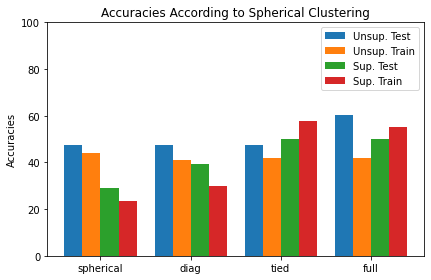

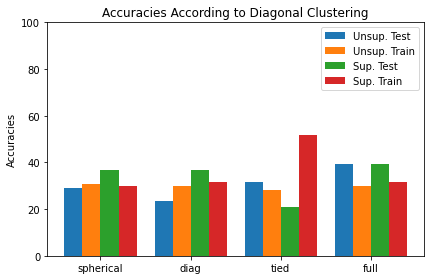

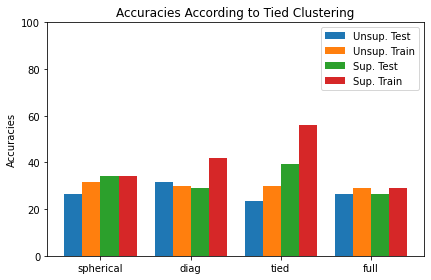

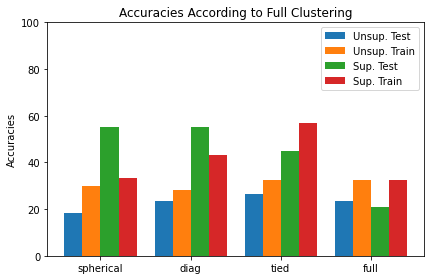

In [95]:
vizAll(un, sup)